In [4]:
import requests 
import json

# Documentación de código
## 1.1 Limpieza DB Cosmos
- Para la limpieza de la base de datos la hize usando la api que creé
lo cual lo hace sencillo y eficiente, simplemente es ejecutar la api __https://github.com/NicoLa5Tor/COSMOS-LAS__
y escojer el servicio,que en este caso es __/delete_database__, que solo necesita un parámetro, pero dado que no me acuerdo de el nombre de la base de datos para eliminarla, y 
surgió un problema para abrir azure por la autenticación, voy a usar otro servicio de la api
llamado __/list_databases__ que no recibe ningún parámetro, la api arroja este formato __json__.

            def list_databases():
                url = 'http://127.0.0.1:5000/list_databases'
                response = requests.get(url)
                try:
                    print(json.dumps(response.json(),indent=2))
                except Exception as e:
                    print(f'Error {e}')
                {
                      "response": {
                        "database_1": {   
                          "data": {
                            "_colls": "colls/",
                            "_etag": "\"00009a09-0000-4d00-0000-66184e750000\"",
                            "_rid": "+01WAA==",
                            "_self": "dbs/+01WAA==/",
                            "_ts": 1712868981,
                            "_users": "users/",
                            "id": "SoftwareScan"
                          }
                        }
                      },
                      "status": 200          
                 }

    como podemos ver la api retorna toda la información que nos da azure, con respecto a la base de datos
- Ya con el nombre de la base de datos que es SoftwareScan podemos proceder a eliminar la db, usando la funcion __delete_database()__
ya definida en la este notebook, El retorno de esta función es el siguiente formato __json__.

            def delete_database(name):
                url = 'http://127.0.0.1:5000/delete_database'
                data = {
                    "name_Db": name
                }
                try:
                    response = requests.delete(url,json=data)
                    print(json.dumps(response.json(),indent=2))
                except Exception as e:
                    print(f'Error: {e}')
                {
                  "response": "La base de datos SoftwareScan ha sido eliminada",
                  "status": 200
                }

## 1.2 Definición de JSON - primer diseño
- Yo opté por una estructura de mi json un poco simple, con el fin de que fuese más facil recorrerlo después
  En primer lugar, también usé la api local de azure con su servicio __/create_item__ que es metodo POST, en la cual podemos
  organizar nuestro __Json__ como deseemos, el formto designado es el siguiente:
  - Jerarquía:
    
    ##### Nivel 1:
  
     __date_item :__ Este dato guardará la fecha enla que el item fue creado.
    
     __data :__ Esta llave guarda todo con respecto al item

    ##### Nivel 2:

    __name_software :__ Esta llave guarda el nombre del sofware escaneado

    ##### Nivel 3:
    
    __mitre _ {_nobre del cve_} :__ Esta llave guarda la palabra mitre_ con la concatenación del nombre del cve Ejm: mitre_CVE-2018-3399

    ##### Nivel 4:

    __data :__ Esta llave guarda los datos respecto al cve especificos en el sigueinte nivel

    ##### Nivel 5:

    __Id :__ Esta llave guarda el nombre del cve

    __Modified :__ Esta llave guarda el dato extraido de mitre, con respecto a la fecha de modificación del cve

    __Published :__ Esta llave guarda el dato extraido de mitre, con respecto a la fecha de creación del cve

    __Description :__ Esta llave guarda el dato estraido de mitre, con respecto a la descripción del cve

    __Score :__ Esta es la llave encargada de guardar lo relacionado con la severidad del cve, descrito en el siguiente nivel

    ##### Nivel 6:

    __severity :__ Esta llave es la encargada de guardar la severidad del cve, Ejem: 'severiry' : 'LOW'

    __cvss :__ Esta llave e sla encargada de guardar el cvss extraido de mitre

## 1.3 Consulta de posibles apis, costo y beneficio

 - Posibles apis:
   - VulnsDb : Esta api permite buscar las vulnerabilidades de los software, pero esta nos pone primero, limites de busqueda, no se puede hacer una busqueda muy frecuente porque arroja un error por ataque DDOS, y otro problema es que hay que conseguir api key, lo cual ocupa más tiempo.  <br><br>   
   - nvd.nist.gov : Esta api nos permite ver las vulnerabilidades de los software con el único límite de hacer 5 consultas por minuto,
cabe recalcar que esta api no pide api key, lo cual hace que sea la api con más opciones de ser usada para buscar vulnerabilidades de software. <br><br>
   - mitre api : Esta api nos permitirá tener una descriocion más detallada y acertada de los cve.
<br><br>
   - Cosmos_Api : Esta api nos va a permitir ejecutarla en un entorno local, y nos dará todos los servicio CRUD de azure. <br><br>
 - Costo y beneficio:
    - El costo beneficio más acertado es la compración entre VulnsDb y nvd puesto que vulns nos pide una suscripción para poder usarla sin limites lo cual es una gran desventaja con respecto  a nvd puesto que esta no pide ningún tipo se suscripción de ningún tipo. <br><br>
    - El costo beneficio de mitre es que esta, por un lado, no tiene ningún tipo de costo, y por otro lado nos da informacón más accesible y detallada de los cve. <br> <br>
    - El costo beneficion de usar la api de Cosmos es que por un lado no es de paga, solo se clona el repositorio y se adapta a cada usuario, por otro lado nos da la posibilidad de mantener la clave db segura, en vez de colocarla en el codigo, lo cual no sería tan seguro


## Selección de primeras gráficas
 #### Top Vulnerabilidades:
Esta gráfica nos permitirá observar por medio de una gráfica de barras horizontal las vulnerabilidades con respecto a su criticidad
  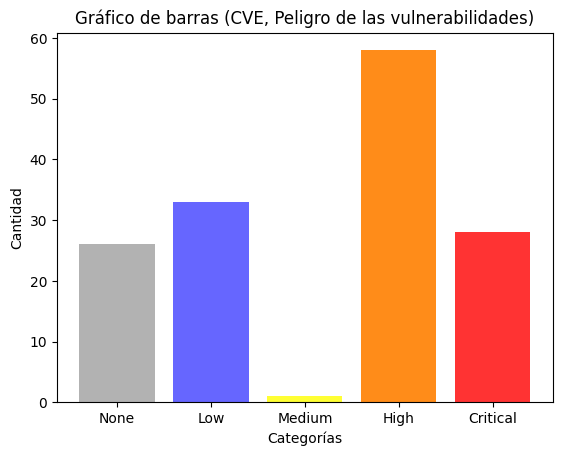

  #### Top Software Vulnerable:
Esta gráfica, que será una de torta, pues esta es más comunmente usada para mostrar direfencias entre dos o mas productos, por lo que
es más intuitiva
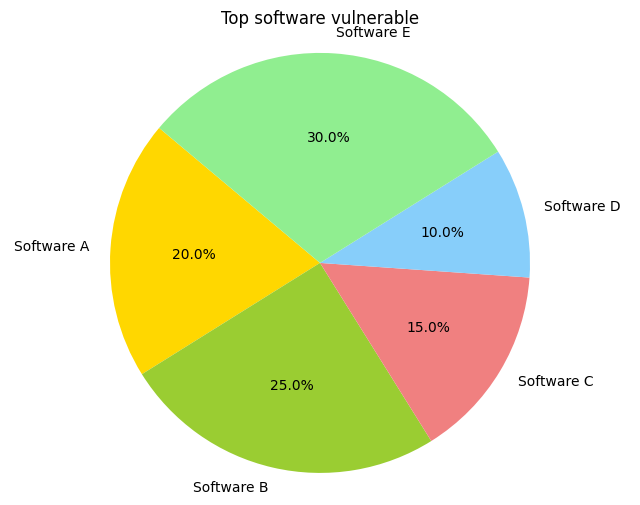

  #### Top CVE por máquina
Esta gráfica, que será de barras, pues mostrará el top 3 de las maquinas con softwares más vulnerables, y dependiendo el sistema operativo
  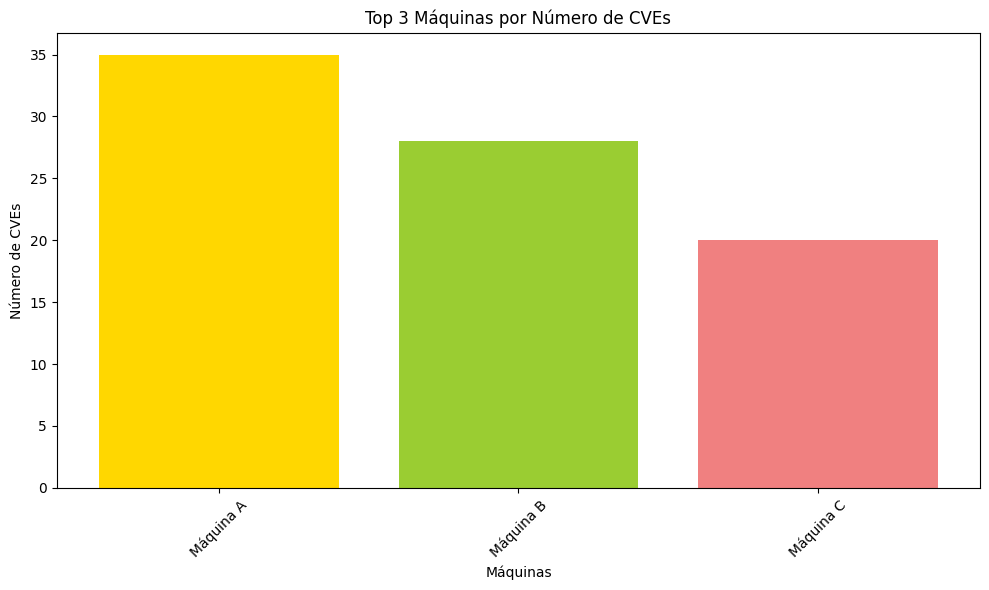
    
    

  
  
   
